## Solução numérica da KdV

Pode-se derivar um método para resolver a equação de KdV usando métodos espectrais. Começamos com a KdV escrita na forma:

$$\partial_t u +3 \partial_x(u)^2+\partial^3_x u=0.$$

A sua transformada de Fourier é portanto:
$$\partial_t \hat{u}+3ik\hat{(u^2)}−ik^3\hat{u}=0.$$

Resolvemos esta equação pelo método de _split step_. Escrevemos a equação como:
$$\partial_t \hat{u}=−3ik\hat{(u^2)}+ik^3\hat{u}.$$

Sabemos resolver a equação:
$$\partial_t \hat{u}=ik^3\hat{u}$$

exactamente, enquanto que para a equação:
$$\partial_t \hat{u}=−3ik\hat{(u^2)}$$

precisamos resover passo a passo numericamente. A ideia do método de _split step_ é resolver alternadamente cada uma destas equações enquanto avançamos de  $t$ para $t+\Delta t$. Então resolvemos:

$$\hat{u}_1(k,t+\Delta t)=\hat{u}(k,t)e^{ik^3\Delta t}$$
$$\hat{u}(k,t+\Delta t) = \hat{u}_1(k,t+\Delta t) −3ik\Delta t\hat{(u_1^2)}$$

Note que estamos a usar o método de Euler para avançar no tempo. A solução será melhor se usarmos um método mais preciso como um Runge-Kutta 4.

O único detalhe com que precisamos ter cuidado é que temos simultaneamente  $u$ e $\hat{u}$ na equação, mas podemos simplesmente usar a transformada de Fourier para as relacionar. A equação fica então:

$$\hat{u}_1(k,t+\Delta t)=\hat{u}(k,t)e^{ik^3\Delta t}$$

$$\hat{u}(k,t+\Delta t) = \hat{u}_1(k,t+\Delta t) −3ik\Delta t \left(\mathcal{F} \left(  \left( \mathcal{F}^{-1}
\left[ \hat{u}_1(k,t+\Delta t) \right] \right)^2  \right) \right)$$

#### solução de 2 solitões
$$u(x,0)= \frac{8}{\cosh^2(2(x+8))} + \frac{2}{\cosh^2(x+1)}$$

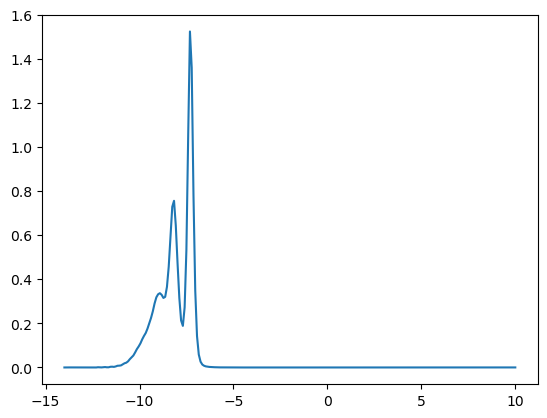

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy import interpolate
%matplotlib inline

N = 256
x = np.linspace(-14,10,N)
delta_x = x[1] - x[0]
delta_k = 2*np.pi/(N*delta_x)

#k1 = np.concatenate((np.arange(N//2),np.arange(-(N//2),0)))*delta_k
k = np.fft.fftfreq(N,delta_x)
#print(k)
#print(k1*delta_k)

c  = 16

#u  = (c/2)*(1.0/np.cosh(np.sqrt(c)*(x+8)/2))**2 # + 8.0/(np.cosh(2*(x+8)) )**2
u  =  1.0/(np.cosh(np.sqrt(2)*(x+9))  )**2
#plt.figure()
#plt.plot(x,np.abs(u))
#plt.show()
delta_t = 0.4/N**2

tmax = 2.75
nmax = np.round(tmax/delta_t)

U = np.fft.fft(u)

for n in np.arange(nmax):
    # primeiro resolvemos a parte linear 
    U = U*np.exp(1j*k**3*delta_t)
    #depois  resolvemos a parte não linear
    U = U - delta_t*(3j*k*np.fft.fft(np.real(np.fft.ifft(U))**2))

plt.figure()
plt.plot(x,np.abs(np.fft.ifft(U)))
plt.show()
